In [3]:
# Enter in cryptogram here
#crypto = "q paxaheflc fo q kaeogw sig sgebo iqez qxx ifo xfma lg hapgya saxx-bwgsw, liaw saqeo zqeb uxqooao lg qjgfz hafwu eapguwfraz. -meaz qxxaw".lower()
crypto = "uplkwbxqh ldvx ob xdhoxq bp sp d rpb pt byozmh, cwb lphb pt byx byozmh byxn ldvx xdhoxq bp sp spz'b zxxs bp cx spzx. -dzsn qppzxn".lower()

### Print Letter Frequencies

In [4]:
# Remove non-alphabetic characters
import re
regex = re.compile('[^a-zA-Z]')
crypto_letters = regex.sub('', crypto)

# Count letter frequencies
import collections
c = collections.Counter(crypto_letters)
print("Cryptogram Letter Counts")
print(c.most_common())
print()
print("Letter Frequencies in English Language")
l_freq_eng = "e t a o i n s r h l d c u m f p g w y b v k x j q z".split()
print("e t a o i n s r h l d c u m f p g w y b v k x j q z")

Cryptogram Letter Counts
[('p', 14), ('x', 14), ('b', 13), ('z', 7), ('h', 6), ('d', 6), ('s', 6), ('o', 5), ('l', 4), ('q', 4), ('y', 4), ('n', 3), ('w', 2), ('v', 2), ('t', 2), ('m', 2), ('c', 2), ('u', 1), ('k', 1), ('r', 1)]

Letter Frequencies in English Language
e t a o i n s r h l d c u m f p g w y b v k x j q z


<BarContainer object of 20 artists>

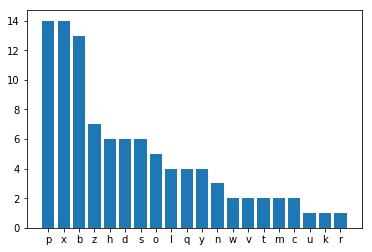

In [15]:
import matplotlib.pyplot as plt

# Get most common key value pairs as x, y axes
most_common_k = [k for k, v in c.most_common()]
most_common_v = [v for k, v in c.most_common()]

plt.bar(most_common_k, most_common_v, align='center')

### Double Letter Frequencies

In [121]:
prev_l = ''
double_letters = []
for l in crypto:
  if l.isalpha():
    if prev_l == l:
      double_letters += [l]
    prev_l = l
double_letters = set(double_letters)
 
print("Cryptograms Double Letter Frequency")
for d in double_letters:
  print('{}:{}, '.format(d, c[d]), end='')

# Frequency of double letters
dl = "l s e o t f p r m c n d g i b".split()
print()
print("Double Letter Frequency in English")
print(dl)

Cryptograms Double Letter Frequency
x:14, p:14, 
Double Letter Frequency in English
['l', 's', 'e', 'o', 't', 'f', 'p', 'r', 'm', 'c', 'n', 'd', 'g', 'i', 'b']


### Print Known Letters

In [0]:
# Create alphabet to crypto letter mappings
alphabet = "a b c d e f g h i j k l m n o p q r s t u v w x y z".lower().split()
replaces = "- t - - - - - - - - - - - - - - - - - - - - - e - -".lower().split()

In [123]:
# Convert letter mapping dictionary from letter mapping lists above
alpha2crypto_guess = {}
for l, r in zip(alphabet, replaces):
  if r.isalpha():
    alpha2crypto_guess[l] = r
  else:
    alpha2crypto_guess[l] = '_'
    
# Show letter replacements
for k, i in alpha2crypto_guess.items():
  print('{}={}, '.format(k, i), end='')

a=_, b=t, c=_, d=_, e=_, f=_, g=_, h=_, i=_, j=_, k=_, l=_, m=_, n=_, o=_, p=_, q=_, r=_, s=_, t=_, u=_, v=_, w=_, x=e, y=_, z=_, 

In [0]:
# Decode
def crypto_decode(alpha2crypto):
  decoded = []

  for character in crypto:
    if character.isalpha():
      decoded += [alpha2crypto[character]]
    else:
      decoded += [character]
      
  return decoded

In [0]:
def print_decoded(decoded):
  for l in decoded:
    print(l, end='')
  print()

In [0]:
def print_crypto(crypto):
  for l in crypto:
    print(l, end='')

In [127]:
decoded = crypto_decode(alpha2crypto_guess)
print_decoded(decoded)

_____te__ ___e _t e___e_ t_ __ _ __t __ t_____, __t ___t __ t_e t_____ t_e_ ___e e___e_ t_ __ ___'t _ee_ t_ _e ___e. -____ ____e_


### Solve Crypto

In [84]:
import pandas as pd
#url = 'https://raw.githubusercontent.com/dwyl/english-words/master/words.txt'
url = 'https://gist.githubusercontent.com/h3xx/1976236/raw/bbabb412261386673eff521dddbe1dc815373b1d/wiki-100k.txt'
eng_words = pd.read_csv(url, sep=" ", header=None, skiprows=26, error_bad_lines=False)
eng_words.columns=["words"]

b'Skipping line 126: expected 1 fields, saw 4\nSkipping line 227: expected 1 fields, saw 4\nSkipping line 328: expected 1 fields, saw 4\nSkipping line 429: expected 1 fields, saw 4\nSkipping line 530: expected 1 fields, saw 4\nSkipping line 631: expected 1 fields, saw 4\nSkipping line 732: expected 1 fields, saw 4\nSkipping line 833: expected 1 fields, saw 4\nSkipping line 934: expected 1 fields, saw 4\nSkipping line 1035: expected 1 fields, saw 4\nSkipping line 1136: expected 1 fields, saw 4\nSkipping line 1237: expected 1 fields, saw 4\nSkipping line 1338: expected 1 fields, saw 4\nSkipping line 1439: expected 1 fields, saw 4\nSkipping line 1538: expected 1 fields, saw 4\nSkipping line 1639: expected 1 fields, saw 4\nSkipping line 1739: expected 1 fields, saw 4\nSkipping line 1840: expected 1 fields, saw 4\nSkipping line 1941: expected 1 fields, saw 4\nSkipping line 2042: expected 1 fields, saw 4\nSkipping line 2142: expected 1 fields, saw 4\nSkipping line 2243: expected 1 fields, sa

In [0]:
#two_letter_words = ['of', 'to', 'in', 'it', 'is', 'be', 'as', 'at', 'so', 'we', 'he', 'by', 'or', 'on', 'do', 'if', 'me', 'my', 'up', 'an', 'go', 'no', 'us', 'am']
two_letter_words = eng_words[eng_words['words'].str.len() == 2]
three_letter_words = eng_words[eng_words['words'].str.len() == 3]
four_letter_words = eng_words[eng_words['words'].str.len() == 4]
five_letter_words = eng_words[eng_words['words'].str.len() == 5]
six_letter_words = eng_words[eng_words['words'].str.len() == 6]
seven_letter_words = eng_words[eng_words['words'].str.len() == 7]

In [0]:
def get_letters(alpha2crypto, crypto_cnts, l_freq_eng, try_n=5):
  crypto_used_letters = [k for k, v in alpha2crypto.items() if v != '_']
  print(crypto_used_letters)
  
  crypto_letters = [l for l in crypto_cnts if l not in crypto_used_letters]
  print(crypto_letters)
  if len(crypto_letters) > try_n:
    crypto_letters = crypto_letters[:try_n]
  
  eng_used_letters = [l for l in alpha2crypto.values() if l != '_']
  eng_letters = [l for l in l_freq_eng if l not in eng_used_letters]
  if len(eng_letters) > try_n:
    eng_letters = eng_letters[:try_n]
    
  return crypto_letters, eng_letters 

In [133]:
try_n = 11 # Number of letters to test
potential_decodings = []
most_probable = collections.Counter()
crypto_letters, eng_letters = get_letters(alpha2crypto_guess, c, l_freq_eng)

import itertools
crypto_permutations = list(itertools.permutations(crypto_letters)) # Create all possible combinations of the most common letters

greatest_prob = 0
for permutation in crypto_permutations:
  alpha2crypto = alpha2crypto_guess.copy()
  
  # Add mappings to dictionary for mapped letters (mapped letters are assigned from the most common permutations)
  for i, l in enumerate(permutation):
      alpha2crypto[l] = eng_letters[i]
      
  # Add _ for all unmapped letters
  for l in alphabet:
    if l not in alpha2crypto.keys():
      alpha2crypto[l] = '_'
  
  potential_decoding = crypto_decode(alpha2crypto)
  
  # 1 letter words have to be 'I' or 'A', else skip
  valid = True
  valid_cnt = 0
  invalid_cnt = 0
  words = ''.join(potential_decoding).split()
  for w in words:
    if len(w) == 1 and w != '_':
      if w != 'i' and w != 'a': 
        valid = False
        break
    else:
      df = eng_words
      if len(w) == 2:
        df = two_letter_words
      elif len(w) == 3:
        df = three_letter_words
      elif len(w) == 4:
        df = four_letter_words
      elif len(w) == 5:
        df = five_letter_words
      elif len(w) == 6:
        df = six_letter_words
      elif len(w) == 7:
        df = seven_letter_words
      
      regexp = ''
      for l in w:
        if l == '_':
          regexp += '[-A-Za-z]'
        else:
          regexp += l
      valid_word = df['words'].str.contains(regexp, regex=True).any()
      if valid_word:
        valid_cnt += 1
      else:
        invalid_cnt +=1
#         if invalid_cnt/len(words) > 0.5:
#           valid = False
#           break
        
  if valid:
    match_probability = valid_cnt/len(words)
    most_probable[''.join(potential_decoding)] = match_probability
    
    if len(most_probable) > 5:
      most_probable = collections.Counter(dict(most_probable.most_common(5)))
      
    if match_probability > greatest_prob:
      greatest_prob = match_probability
      print(match_probability)
      print_decoded(potential_decoding)
    
    
    potential_decodings += [potential_decoding]
  
  #print_decoded(potential_decoding)  
print_crypto(crypto)

['b', 'x']
['u', 'p', 'l', 'k', 'w', 'q', 'h', 'd', 'v', 'o', 's', 'r', 't', 'y', 'z', 'm', 'c', 'n']
0.8518518518518519
aoinste__ i__e _t e___e_ to _o _ _ot o_ t_____, _st io_t o_ t_e t_____ t_e_ i__e e___e_ to _o _o_'t _ee_ to _e _o_e. -____ _oo_e_
0.8888888888888888
aoniste__ n__e _t e___e_ to _o _ _ot o_ t_____, _st no_t o_ t_e t_____ t_e_ n__e e___e_ to _o _o_'t _ee_ to _e _o_e. -____ _oo_e_
uplkwbxqh ldvx ob xdhoxq bp sp d rpb pt byozmh, cwb lphb pt byx byozmh byxn ldvx xdhoxq bp sp spz'b zxxs bp cx spzx. -dzsn qppzxn

In [132]:
most_probable.most_common()

[("aoniste__ n__e _t e___e_ to _o _ _ot o_ t_____, _st no_t o_ t_e t_____ t_e_ n__e e___e_ to _o _o_'t _ee_ to _e _o_e. -____ _oo_e_",
  0.8888888888888888),
 ("aosinte__ s__e _t e___e_ to _o _ _ot o_ t_____, _nt so_t o_ t_e t_____ t_e_ s__e e___e_ to _o _o_'t _ee_ to _e _o_e. -____ _oo_e_",
  0.8888888888888888),
 ("aonsite__ n__e _t e___e_ to _o _ _ot o_ t_____, _it no_t o_ t_e t_____ t_e_ n__e e___e_ to _o _o_'t _ee_ to _e _o_e. -____ _oo_e_",
  0.8888888888888888),
 ("aosnite__ s__e _t e___e_ to _o _ _ot o_ t_____, _it so_t o_ t_e t_____ t_e_ s__e e___e_ to _o _o_'t _ee_ to _e _o_e. -____ _oo_e_",
  0.8888888888888888),
 ("ainoste__ n__e _t e___e_ ti _i _ _it i_ t_____, _st ni_t i_ t_e t_____ t_e_ n__e e___e_ ti _i _i_'t _ee_ ti _e _i_e. -____ _ii_e_",
  0.8888888888888888)]

### Compare crypto to all english words

In [0]:
match_count = collections.Counter()
for i, p in enumerate(potential_decodings):
  words = ''.join(p).split()
  
  word_matches = []
  cnt = 0
  for w in words:
    if '_' not in w:
      if eng_words['words'].eq(w).any():
        word_matches += [w]
        cnt += 1
  match_count[''.join(p)] = cnt
  if len(set(word_matches)) > 2:      
    #print('{}: {}'.format(i, set(word_matches)))
    print_decoded(p)

_oh__tern ha_e it eanier to so a _ot o_ t_il_n, __t hont o_ t_e t_il_n t_e_ ha_e eanier to so sol't lees to _e sole. -als_ roole_
_ol__tehs la_e it easieh to no a _ot o_ t_ir_s, __t lost o_ t_e t_ir_s t_e_ la_e easieh to no nor't reen to _e nore. -arn_ hoore_
_ol__ters la_e it easier to no a _ot o_ t_ih_s, __t lost o_ t_e t_ih_s t_e_ la_e easier to no noh't heen to _e nohe. -ahn_ roohe_
_oh__tern hi_e at einaer to so i _ot o_ t_al_n, __t hont o_ t_e t_al_n t_e_ hi_e einaer to so sol't lees to _e sole. -ils_ roole_
_ol__tehs li_e at eisaeh to no i _ot o_ t_ar_s, __t lost o_ t_e t_ar_s t_e_ li_e eisaeh to no nor't reen to _e nore. -irn_ hoore_
_oh__selr ha_e is eariel so no a _os o_ s_it_r, __s hors o_ s_e s_it_r s_e_ ha_e eariel so no not's teen so _e note. -atn_ loote_
_ol__sehr la_e is earieh so no a _os o_ s_it_r, __s lors o_ s_e s_it_r s_e_ la_e earieh so no not's teen so _e note. -atn_ hoote_
_or__selh ra_e is eahiel so no a _os o_ s_it_h, __s rohs o_ s_e s_it_h s_e_ ra_e eahiel so

In [0]:
match_count.most_common()

[('a _ete_ni__ is a _ensor __o _on_s _an_ att _is ti_e _o _e_o_e _ett-_ro_r, __er _eans _an_ _tasses _o a_oi_ _eir_ ne_o_ri_e_. -_ne_ atter',
  5),
 ('a _ete_si__ in a _esnor __o _os_n _as_ att _in ti_e _o _e_o_e _ett-_ro_r, __er _easn _as_ _tannen _o a_oi_ _eir_ se_o_ri_e_. -_se_ atter',
  5),
 ('a _ete_oi__ is a _eosnr __n _no_s _ao_ att _is ti_e _n _e_n_e _ett-_rn_r, __er _eaos _ao_ _tasses _n a_ni_ _eir_ oe_n_ri_e_. -_oe_ atter',
  5),
 ('a _ete_oi__ in a _eonsr __s _so_n _ao_ att _in ti_e _s _e_s_e _ett-_rs_r, __er _eaon _ao_ _tannen _s a_si_ _eir_ oe_s_ri_e_. -_oe_ atter',
  5),
 ('a _ete_ns__ so a _enoir __i _in_o _an_ att _so ts_e _i _e_i_e _ett-_ri_r, __er _eano _an_ _taooeo _i a_is_ _esr_ ne_i_rs_e_. -_ne_ atter',
  5),
 ('a _ete_sn__ no a _esoir __i _is_o _as_ att _no tn_e _i _e_i_e _ett-_ri_r, __er _easo _as_ _taooeo _i a_in_ _enr_ se_i_rn_e_. -_se_ atter',
  5),
 ('a _ete_is__ so a _eionr __n _ni_o _ai_ att _so ts_e _n _e_n_e _ett-_rn_r, __er _eaio _ai_ _taooeo _n a_ns_ _e

### Method 2

In [0]:
one_letter_words = ['a', 'i']
two_letter_words = ['of', 'to', 'in', 'it', 'is', 'be', 'as', 'at', 'so', 'we', 'he', 'by', 'or', 'on', 'do', 'if', 'me', 'my', 'up', 'an', 'go', 'no', 'us', 'am']
one_letter_crypto = set([w for w in crypto.split() if len(w) == 1])
two_letter_crypto = set([w for w in crypto.split() if len(w) == 2])

In [0]:
one_letter_most_common = [l for l in [k for k, _ in c.most_common()] if l in one_letter_words]

In [0]:
try_n = 3 # Number of letters to test
potential_decodings = []

most_common = [l for l, v in c.most_common() if l not in one_letter] # Most common excluding one letter words in crypto
crypto_permutations = list(itertools.permutations([l for l in most_common[:try_n]])) # Create all possible combinations of the most common letters

In [0]:
def create_decoding(alpha2crypto, crypto_letters, mapped_letters):
  # Add mappings to dictionary for mapped letters (mapped letters are assigned from the most common permutations)
  for i, l in enumerate(crypto_letters):
      alpha2crypto[l] = mapped_letters[i]

  # Add _ for all unmapped letters
  for l in alphabet:
    if l not in alpha2crypto.keys():
      alpha2crypto[l] = '_'

  return crypto_decode(alpha2crypto)

In [0]:
alpha2crypto = {}
one_letter_crypto_permutations = list(itertools.permutations(one_letter_crypto)) # Create all possible combinations of single letter words
for olcp in one_letter_crypto_permutations:
  for olc_i, olc in enumerate(olcp):
    alpha2crypto[olc] = one_letter_most_common[olc_i]
  
alpha2crypto

{'q': 'a'}

In [0]:
for permutation in crypto_permutations:
  alpha2crypto = {}

  # Add mappings to dictionary for mapped letters (mapped letters are assigned from the most common permutations)
  for i, l in enumerate(permutation):
      alpha2crypto[l] = l_freq_eng[:try_n][i]

  # Add _ for all unmapped letters
  for l in alphabet:
    if l not in alpha2crypto.keys():
      alpha2crypto[l] = '_'

  potential_decoding = crypto_decode(alpha2crypto)
  potential_decodings += [potential_decoding]
  print_decoded(potential_decoding)  
print_crypto(crypto)

[('a', 'x', 'g', 'e', 'o', 'f', 'w'),
 ('a', 'x', 'g', 'e', 'o', 'w', 'f'),
 ('a', 'x', 'g', 'e', 'f', 'o', 'w'),
 ('a', 'x', 'g', 'e', 'f', 'w', 'o'),
 ('a', 'x', 'g', 'e', 'w', 'o', 'f'),
 ('a', 'x', 'g', 'e', 'w', 'f', 'o'),
 ('a', 'x', 'g', 'o', 'e', 'f', 'w'),
 ('a', 'x', 'g', 'o', 'e', 'w', 'f'),
 ('a', 'x', 'g', 'o', 'f', 'e', 'w'),
 ('a', 'x', 'g', 'o', 'f', 'w', 'e'),
 ('a', 'x', 'g', 'o', 'w', 'e', 'f'),
 ('a', 'x', 'g', 'o', 'w', 'f', 'e'),
 ('a', 'x', 'g', 'f', 'e', 'o', 'w'),
 ('a', 'x', 'g', 'f', 'e', 'w', 'o'),
 ('a', 'x', 'g', 'f', 'o', 'e', 'w'),
 ('a', 'x', 'g', 'f', 'o', 'w', 'e'),
 ('a', 'x', 'g', 'f', 'w', 'e', 'o'),
 ('a', 'x', 'g', 'f', 'w', 'o', 'e'),
 ('a', 'x', 'g', 'w', 'e', 'o', 'f'),
 ('a', 'x', 'g', 'w', 'e', 'f', 'o'),
 ('a', 'x', 'g', 'w', 'o', 'e', 'f'),
 ('a', 'x', 'g', 'w', 'o', 'f', 'e'),
 ('a', 'x', 'g', 'w', 'f', 'e', 'o'),
 ('a', 'x', 'g', 'w', 'f', 'o', 'e'),
 ('a', 'x', 'e', 'g', 'o', 'f', 'w'),
 ('a', 'x', 'e', 'g', 'o', 'w', 'f'),
 ('a', 'x', 